# 1. Przygotwanie danych 

## Import bibliotek

In [ ]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
from time import sleep
import random
import numpy as np
import pandas as pd
import os

from google.colab import drive

## Podłączenie dysku google

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Tworzenie funkcji potrzebnych do importu danych

In [ ]:
def get_page(vehicle_type, page_number):
  url = f'https://www.otomoto.pl/{vehicle_type}/?page={page_number}'

  try:
    response = requests.get(url)
    content = response.content
    sleep(random.randint(1,3))
    return content
  except:
    print('Fail')

def parse_images_urls(content):
  soup = BeautifulSoup(content, 'html.parser')
  imgs = soup.find_all('img', {'class':"e1b25f6f18 ooa-ep0of3"})
  return [img['src'] for img in imgs]

def get_image(url, path, vehicle_type):
  try:
    response = requests.get(url)
    content = response.content
    img = Image.open(BytesIO(content))
    file_name = url.split('/')[-2].split('.')[-2] + '.jpg' #tu na podstawie adresu url tworzymy nazwę pliku
    os.makedirs(f'{path}/{vehicle_type}', exist_ok=True) #tu jak folder do zapisu nie istnieje
    img.save(f'{path}/{vehicle_type}/{file_name}')
  except:
    print('Fail')

def get_data(vehicle_type, start_page, end_page, path):
  for page_number in range(start_page, end_page + 1):
    content = get_page(vehicle_type, page_number)
    urls = parse_images_urls(content)
    for i, url in enumerate(urls):
      get_image(url, path, vehicle_type)
      if i % 20 == 0:
        print(f'Download {i} imagesform page {page_number}')

## Ekstrakcja zdjęć z danych przy pomocy Beautifull soup

In [ ]:
data_path = 'drive/MyDrive/Otomoto_pic/pic_categories'

In [ ]:
content = get_page('osobowe', 1)

In [ ]:
soup = BeautifulSoup(content, 'html.parser')

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="pl">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="OTOMOTO - nowe i używane samochody i motocykle w Polska" name="description"/>
  <meta content="1563466353912532" property="fb:app_id"/>
  <meta content="OTOMOTO - nowe i używane samochody i motocykle w Polska" property="og:description"/>
  <meta content="https://www.otomoto.pl/osobowe?page=1" property="og:url"/>
  <meta content="website" property="og:type"/>
  <meta content="//statics.otomoto.pl/optimus-storage/a/otomotopl/images/fb-image200x200.png" property="og:image"/>
  <meta content="otomoto.pl" property="og:site_name"/>
  <meta content="444086109" property="al:ios:app_store_id"/>
  <meta content="Otomoto" property="al:ios:app_name"/>
  <meta content="otomoto.pl://otomoto.pl/osobowe?page=1" property="al:ios:url"/>
  <meta content="Otomoto" property="al:android:app_name"/>
  <meta content="pl.otomoto" property="al:andr

In [ ]:
url = 'https://ireland.apollo.olxcdn.com/v1/files/eyJmbiI6Im45aTJqOXhqbnRvaTItT1RPTU9UT1BMIiwidyI6W3siZm4iOiJ3ZzRnbnFwNnkxZi1PVE9NT1RPUEwiLCJzIjoiMTYiLCJwIjoiMTAsLTEwIiwiYSI6IjAifV19.hM4w3sWV51ZeoRTINOQDJIbayrBUtFm8nGCqf0Bl6w0/image;s=320x240'

In [ ]:
 file_name = url.split('/')[-2].split('.')[-2] + '.jpg'

In [ ]:
 file_name

'eyJmbiI6Im45aTJqOXhqbnRvaTItT1RPTU9UT1BMIiwidyI6W3siZm4iOiJ3ZzRnbnFwNnkxZi1PVE9NT1RPUEwiLCJzIjoiMTYiLCJwIjoiMTAsLTEwIiwiYSI6IjAifV19.jpg'

In [ ]:
soup.find_all('img', {'class':"e1b25f6f18 ooa-ep0of3"})

[<img alt="Volkswagen Multivan" class="e1b25f6f18 ooa-ep0of3" loading="eager" src="https://ireland.apollo.olxcdn.com/v1/files/eyJmbiI6InZucnZtdnJtajdrYzEtT1RPTU9UT1BMIiwidyI6W3siZm4iOiJ3ZzRnbnFwNnkxZi1PVE9NT1RPUEwiLCJzIjoiMTYiLCJwIjoiMTAsLTEwIiwiYSI6IjAifV19.URyqBeyP_OEUxOrh1Dg8eAQyIZzVl_NomzkNUFK9Amg/image;s=320x240"/>,
 <img alt="Hyundai ix35" class="e1b25f6f18 ooa-ep0of3" loading="eager" src="https://ireland.apollo.olxcdn.com/v1/files/eyJmbiI6IjF3eXNvYjd2azJ6NTEtT1RPTU9UT1BMIiwidyI6W3siZm4iOiJ3ZzRnbnFwNnkxZi1PVE9NT1RPUEwiLCJzIjoiMTYiLCJwIjoiMTAsLTEwIiwiYSI6IjAifV19.Rn0co2_6bBge5JgS8oC6tj-mKw6MkaOPMOmrCJ0Sois/image;s=320x240"/>,
 <img alt="BMW X1" class="e1b25f6f18 ooa-ep0of3" loading="lazy" src="https://ireland.apollo.olxcdn.com/v1/files/eyJmbiI6InpiNjhsZGl2OHl0ZjEtT1RPTU9UT1BMIiwidyI6W3siZm4iOiJ3ZzRnbnFwNnkxZi1PVE9NT1RPUEwiLCJzIjoiMTYiLCJwIjoiMTAsLTEwIiwiYSI6IjAifV19.ssHvEZ5O1UvGYaUwoeqWsIl4Qurn7qKpF4YyiVpqsBo/image;s=320x240"/>,
 <img alt="Ford Kuga 2.0 TDCi AWD ST-Line" class="e1

## Pobieranie danych

In [ ]:
# get_data('osobowe', 1, 2, data_path + '/train')

In [ ]:
# get_data('osobowe', 1, 20, data_path + '/train')
# get_data('motocykle-i-quady', 1, 20, data_path + '/train')
# get_data('dostawcze', 1, 20, data_path + '/train')
# get_data('ciezarowe', 1, 20, data_path + '/train')

## Wyświetlenie ilość zdjęć w folderach 

In [ ]:
print(len(os.listdir(f'{data_path}/train/osobowe')))
print(len(os.listdir(f'{data_path}/train/motocykle-i-quady')))
print(len(os.listdir(f'{data_path}/train/dostawcze')))
print(len(os.listdir(f'{data_path}/train/ciezarowe')))

424
481
381
464


## Przenoszenie części plików z folderu train do folderu test

In [ ]:


# os.makedirs(data_path + '/test', exist_ok=True)
# test_size = 0.2

# for vehicle_type in ['osobowe', 'motocykle-i-quady', 'dostawcze','ciezarowe']:
#   os.makedirs(data_path + '/test/' + vehicle_type, exist_ok=True)
#   file_list = os.listdir(data_path + '/train/' + vehicle_type)
#   number_of_samples = int(len(file_list) * test_size)
#   for file_name in random.sample(file_list, number_of_samples):
#     os.rename(data_path + '/train/' + vehicle_type + '/' + file_name,
#               data_path + '/test/' + vehicle_type + '/' + file_name)

In [ ]:
print(len(os.listdir(f'{data_path}/test/osobowe')))

105


# 2. Tworzenie modelu

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dropout

## Załadunek danych

In [ ]:
batch_size = 16
img_height = 128
img_width = 128 #trzeba pamietac ze do raz wytrenowanej sieci nie mozna podawac obrazków o innych wielkosciach
data_dir = data_path + '/train'

## Podział danych na zbiory treningowy oraz walidacyjny

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training', # tutaj wyciągamy 80%
    seed=0, # seed jest po to zebyśmy mieli wyodrebnienie validacyjnego z treningowego
    image_size = (img_height, img_width),
    batch_size = batch_size,
    label_mode = 'categorical'
)

val_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation', #tutaj wyciągamy 20%
    seed=0,
    image_size = (img_height, img_width),
    batch_size = batch_size,
    label_mode = 'categorical'
)

Found 1750 files belonging to 4 classes.
Using 1400 files for training.
Found 1750 files belonging to 4 classes.
Using 350 files for validation.


In [ ]:
print(train_ds.class_names)

['ciezarowe', 'dostawcze', 'motocykle-i-quady', 'osobowe']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 128, 128, 3)
(16, 4)


# 3. Trenowanie modelu

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow

In [ ]:
num_classes = len(train_ds.class_names)

model = Sequential()
model.add(layers.Rescaling(1./255)) #kropka oznacza ze ma nam zwrócić float czyli liczbe z resztą po kropce
model.add(layers.Conv2D(64, (3,3), activation='relu',
                        input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(Dropout(0.5)) # między kolejnymi warstwami usuwa 50% połączeń

model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(Dropout(0.5))

model.add(layers.Conv2D(8, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu' ))
model.add(layers.Dense(num_classes, activation='softmax' ))

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# dobtym zwyczajem jest dawac potęgi liczby 2 w liczbie neuronow w sieci. Im wiecej neuronow tym wiecej beda mogly rozpoznawac ksztaltow i bardziej skomplikowanych ale jednoczesnie bedzie wieksze ryzyko overfittingu i bedzie wolniej się uczyć.

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 30, 
    verbose = 1,
    batch_size = 16,
)

Epoch 1/30
88/88 [==============================] - 230s 3s/step - loss: 1.3438 - accuracy: 0.3486 - val_loss: 1.3581 - val_accuracy: 0.4486
Epoch 2/30
88/88 [==============================] - 56s 629ms/step - loss: 1.1125 - accuracy: 0.5121 - val_loss: 1.0897 - val_accuracy: 0.5629
Epoch 3/30
88/88 [==============================] - 56s 638ms/step - loss: 0.9598 - accuracy: 0.6021 - val_loss: 1.0034 - val_accuracy: 0.6771
Epoch 4/30
88/88 [==============================] - 57s 644ms/step - loss: 0.8960 - accuracy: 0.6300 - val_loss: 0.8418 - val_accuracy: 0.7029
Epoch 5/30
88/88 [==============================] - 58s 653ms/step - loss: 0.7886 - accuracy: 0.6714 - val_loss: 0.8245 - val_accuracy: 0.7200
Epoch 6/30
88/88 [==============================] - 56s 636ms/step - loss: 0.7196 - accuracy: 0.7071 - val_loss: 0.7580 - val_accuracy: 0.7143
Epoch 7/30
88/88 [==============================] - 57s 642ms/step - loss: 0.6703 - accuracy: 0.7457 - val_loss: 0.7662 - val_accuracy: 0.7114
E

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                    

In [ ]:
#w colabie po rozłączeniu środowiska tracimy zmienną model dlatego trenowanie zaczyna się od nowa

## Tworzenie wykresów obrazujących jakość modelu

In [ ]:
from matplotlib import pyplot as plt

def plot_history(history):
 #Plot the Loss Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['loss'],'r',linewidth=3.0)
 plt.plot(history.history['val_loss'],'b',linewidth=3.0)
 plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Loss',fontsize=16)
 plt.title('Loss Curves',fontsize=16)
 #Plot the Accuracy Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
 plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)
 plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Accuracy',fontsize=16)
 plt.title('Accuracy Curves',fontsize=16)

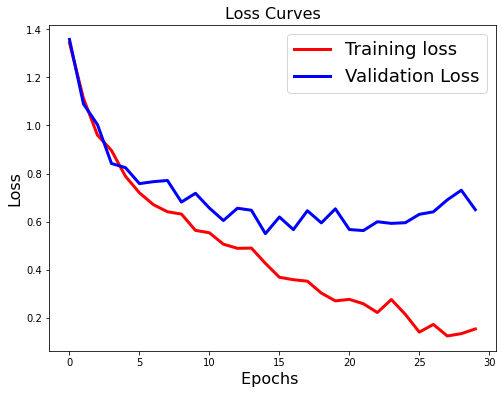

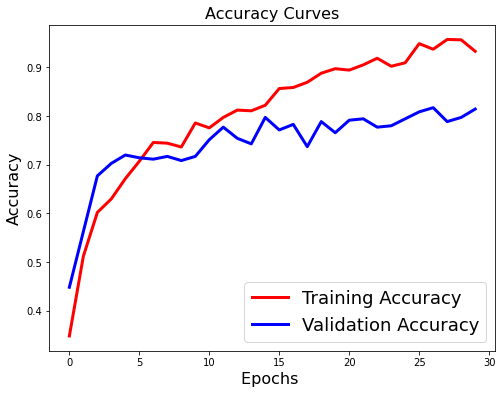

In [ ]:
plot_history(history)

In [ ]:
#należy popracować nad overfittingiem. Do tego służy funkcja Dropout która usuwa neurony po danej sekwencji.

# 4. Sprawdzanie zbioru testowego

In [ ]:
data_dir = 'drive/MyDrive/Otomoto_pic/pic_categories/test'

test_ds = keras.utils.image_dataset_from_directory(
  data_dir,
  image_size=(img_height, img_width),
  label_mode='categorical',
  shuffle=False)

Found 436 files belonging to 4 classes.


In [ ]:
y_pred = model.predict(test_ds).argmax(axis=1)

14/14 [==============================] - 67s 5s/step


In [ ]:
y_test = [np.argmax(label, axis=1) for img, label in test_ds]
y_test = np.concatenate(y_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       116
           1       0.73      0.67      0.70        95
           2       0.92      0.84      0.88       120
           3       0.70      0.88      0.78       105

    accuracy                           0.79       436
   macro avg       0.79      0.79      0.79       436
weighted avg       0.80      0.79      0.79       436



In [ ]:
#czym było support? liczba przewidywanych próbek

## Confusion matrix

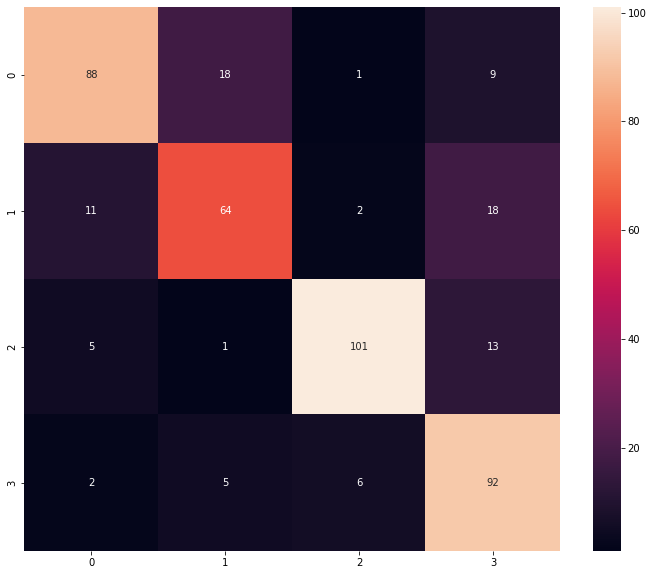

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(12,10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# 5. Predykcja dla pojedynczego zdjęcia

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
img_dir = 'drive/MyDrive/Otomoto_pic/pic_categories/Predykcja_dla_1_zdj'
img = cv2.imread(img_dir + '/' + os.listdir(img_dir)[1])
cv2_imshow(img)

In [ ]:
resized = cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_AREA)

In [ ]:
pred = model.predict(np.array([resized])).argmax(axis=1)
test_ds.class_names[pred[0]]

1/1 [==============================] - 0s 36ms/step


'osobowe'

In [ ]:
img_dir = 'drive/MyDrive/Otomoto_pic/pic_categories/Predykcja_dla_1_zdj'
img = cv2.imread(img_dir + '/' + os.listdir(img_dir)[2])
cv2_imshow(img)

In [ ]:
resized = cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_AREA)

In [ ]:
pred = model.predict(np.array([resized])).argmax(axis=1)
test_ds.class_names[pred[0]]

1/1 [==============================] - 0s 23ms/step


'dostawcze'

# 6. Batch normalization and dropout

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, GlobalAveragePooling2D, Rescaling, BatchNormalization, Dropout
import tensorflow

num_classes = len(train_ds.class_names)

model = Sequential()
model.add(Rescaling(1./255))
model.add(Conv2D(32, (3, 3), activation='relu', 
                 input_shape=(img_width, img_height, 3), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))


model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))


model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10,
  verbose=1,
  batch_size = 64
)

Epoch 1/10
88/88 [==============================] - 292s 3s/step - loss: 1.9143 - accuracy: 0.5321 - val_loss: 4.8204 - val_accuracy: 0.3543
Epoch 2/10
88/88 [==============================] - 288s 3s/step - loss: 0.8400 - accuracy: 0.6729 - val_loss: 6.4370 - val_accuracy: 0.4286
Epoch 3/10
88/88 [==============================] - 288s 3s/step - loss: 0.6641 - accuracy: 0.7350 - val_loss: 9.3717 - val_accuracy: 0.2886
Epoch 4/10
88/88 [==============================] - 287s 3s/step - loss: 0.6006 - accuracy: 0.7629 - val_loss: 4.1432 - val_accuracy: 0.5457
Epoch 5/10
88/88 [==============================] - 287s 3s/step - loss: 0.5238 - accuracy: 0.7886 - val_loss: 3.5401 - val_accuracy: 0.5371
Epoch 6/10
88/88 [==============================] - 288s 3s/step - loss: 0.4532 - accuracy: 0.8257 - val_loss: 3.5134 - val_accuracy: 0.5000
Epoch 7/10
88/88 [==============================] - 290s 3s/step - loss: 0.4026 - accuracy: 0.8521 - val_loss: 2.1891 - val_accuracy: 0.5943
Epoch 8/10
88

# 7. Ponowna predykcja pojedynczego zdjęcia samochodu dostawczego

In [ ]:
img_dir = 'drive/MyDrive/Otomoto_pic/pic_categories/Predykcja_dla_1_zdj'
img = cv2.imread(img_dir + '/' + os.listdir(img_dir)[2])

In [ ]:
resized = cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_AREA)

In [ ]:
pred = model.predict(np.array([resized])).argmax(axis=1)
test_ds.class_names[pred[0]]

1/1 [==============================] - 0s 156ms/step


'ciezarowe'

# 8. Data augmentation

In [ ]:
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom((0.2, 0.3))
])

num_classes = len(train_ds.class_names)

model = Sequential()
model.add(data_augmentation)
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape=(img_width, img_height, 3),
                        padding='same'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(16, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu' ))
model.add(layers.Dense(num_classes, activation='softmax' ))

opt = tensorflow.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10,
    verbose = 1,
    batch_size = 128
)

Epoch 1/10
88/88 [==============================] - 37s 387ms/step - loss: 1.3863 - accuracy: 0.2771 - val_loss: 1.4080 - val_accuracy: 0.2457
Epoch 2/10
88/88 [==============================] - 35s 390ms/step - loss: 1.3837 - accuracy: 0.2764 - val_loss: 1.3528 - val_accuracy: 0.2914
Epoch 3/10
88/88 [==============================] - 33s 371ms/step - loss: 1.3377 - accuracy: 0.3486 - val_loss: 1.3704 - val_accuracy: 0.2686
Epoch 4/10
88/88 [==============================] - 33s 369ms/step - loss: 1.3427 - accuracy: 0.3450 - val_loss: 1.2679 - val_accuracy: 0.4057
Epoch 5/10
88/88 [==============================] - 32s 367ms/step - loss: 1.2380 - accuracy: 0.4114 - val_loss: 1.2389 - val_accuracy: 0.4229
Epoch 6/10
88/88 [==============================] - 33s 368ms/step - loss: 1.1572 - accuracy: 0.4814 - val_loss: 1.1713 - val_accuracy: 0.5086
Epoch 7/10
88/88 [==============================] - 33s 368ms/step - loss: 1.1134 - accuracy: 0.5079 - val_loss: 1.0835 - val_accuracy: 0.5057

# 9. Zastosowanie modelu EfficientNetB0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
efficient_model = EfficientNetB0(weights='imagenet',
                                 include_top=False,
                                 input_shape=(img_width, img_height, 3))

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model = Sequential ()
model.add(efficient_model)

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 4, 4, 1280)       4049571   
                                                                 
 flatten_3 (Flatten)         (None, 20480)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               2621568   
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 4)                 516       
                                                                 
Total params: 6,671,655
Trainable params: 6,629,632
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10,
  verbose=1,
  batch_size = 64
)

Epoch 1/10
88/88 [==============================] - 147s 2s/step - loss: 0.9464 - accuracy: 0.7721 - val_loss: 0.3407 - val_accuracy: 0.9200
Epoch 2/10
88/88 [==============================] - 136s 2s/step - loss: 0.2922 - accuracy: 0.9164 - val_loss: 0.5034 - val_accuracy: 0.9171
Epoch 3/10
88/88 [==============================] - 139s 2s/step - loss: 0.1613 - accuracy: 0.9471 - val_loss: 0.8721 - val_accuracy: 0.8857
Epoch 4/10
88/88 [==============================] - 135s 2s/step - loss: 0.3357 - accuracy: 0.9164 - val_loss: 1.2804 - val_accuracy: 0.8571
Epoch 5/10
88/88 [==============================] - 134s 2s/step - loss: 0.3972 - accuracy: 0.9036 - val_loss: 1.1349 - val_accuracy: 0.9200
Epoch 6/10
88/88 [==============================] - 135s 2s/step - loss: 0.3225 - accuracy: 0.9193 - val_loss: 0.4530 - val_accuracy: 0.8914
Epoch 7/10
88/88 [==============================] - 135s 2s/step - loss: 0.2555 - accuracy: 0.9300 - val_loss: 0.4239 - val_accuracy: 0.9200
Epoch 8/10
88

In [ ]:
from matplotlib import pyplot as plt

def plot_history(history):
 #Plot the Loss Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['loss'],'r',linewidth=3.0)
 plt.plot(history.history['val_loss'],'b',linewidth=3.0)
 plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Loss',fontsize=16)
 plt.title('Loss Curves',fontsize=16)
 #Plot the Accuracy Curves
 plt.figure(figsize=[8,6])
 plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
 plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)
 plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
 plt.xlabel('Epochs ',fontsize=16)
 plt.ylabel('Accuracy',fontsize=16)
 plt.title('Accuracy Curves',fontsize=16)

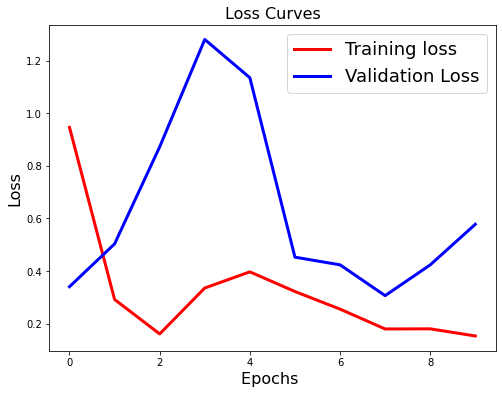

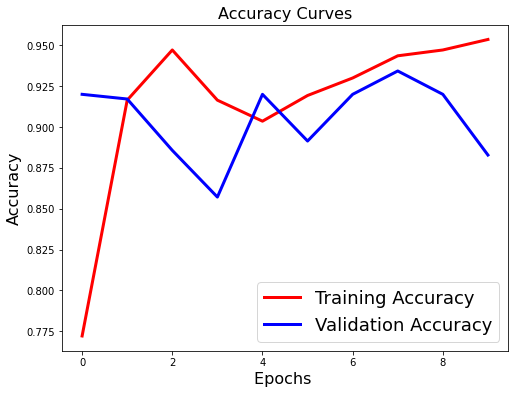

In [ ]:
plot_history(history)

# 10. Ponowna predykcja pojedynczego zdjęcia samochodu osobowego i motoru

In [ ]:
img_dir = 'drive/MyDrive/Otomoto_pic/pic_categories/Predykcja_dla_1_zdj'
img = cv2.imread(img_dir + '/' + os.listdir(img_dir)[0])
cv2_imshow(img)

In [ ]:
resized = cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_AREA)

In [ ]:
pred = model.predict(np.array([resized])).argmax(axis=1)
test_ds.class_names[pred[0]]

1/1 [==============================] - 2s 2s/step


'osobowe'

In [ ]:
img_dir = 'drive/MyDrive/Otomoto_pic/pic_categories/Predykcja_dla_1_zdj'
img = cv2.imread(img_dir + '/' + os.listdir(img_dir)[3])
cv2_imshow(img)

In [ ]:
resized = cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_AREA)

In [ ]:
pred = model.predict(np.array([resized])).argmax(axis=1)
test_ds.class_names[pred[0]]

1/1 [==============================] - 0s 47ms/step


'motocykle-i-quady'

# 11. Detekcja obecności tablicy rejestracyjnej przy pomocy modelu YOLO, 

#oraz ekstrakcja obrazów tablic do osobnych plików

In [ ]:
#teraz należy dołożyć rozpoznawanie tablic rejestracyjnych:
# 1. najpierw dokonać jakiegoś image labelingu i odseparować zdjęcia samochodów od czoła - czy może zrobić samemu taką klasyfikację na podstawie małej próbki? np 10 zdjęć treningowych? czy to ma sens?
# 2. później należy wybrać czy model ma szukać w danej ramce tablicy czy może sam powinien ją znaleźć i przeczytać ->
# 3. na końcu powinniśmy dostać zapis jaki to typ samochodu, tekst z tablicy oraz datę i godzinę przejazdu.

In [ ]:
# muszę upewnić się że folder z labelkami do rozpoznawania tekstu można użyć razem z folderem ze zdjęciami które przecież mają więcej plików. 166 txt do ponad 400 jpeg.
# prawdpodpobnie najpierw muszę wyeksraktować ze zdjęć obszary gdzie znajduje się tablica rejestracyjna metodą crop image
# później należy dopiero nauczyć model rozpoznawania tekstu w tablicach

In [ ]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import os

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
images_dir = 'drive/MyDrive/Otomoto_pic/pic_categories/train/osobowe'

In [ ]:
img_car = cv2.imread(images_dir + '/' + os.listdir(images_dir)[30])

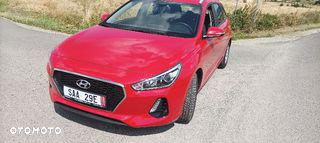

In [ ]:
cv2_imshow(img_car)

In [ ]:
type(img_car)

numpy.ndarray

In [ ]:
yolo_doc_dir = 'drive/MyDrive/Otomoto_pic/tablice'

In [ ]:
yolo_doc = cv2.imread(yolo_doc_dir + '/' + os.listdir(yolo_doc_dir)[1])

In [ ]:
type(yolo_doc) #dlaczego wychodzi w ten sposób nonetype?

NoneType

In [ ]:
# !pip install numpy
!pip install keras==2.10.0
!pip install tensorflow==1.14.0
!pip install opencv-python-headless

# !pip uninstall keras
# !pip uninstall tensorflow
# !pip uninstall opencv-python-headless

Found existing installation: keras 2.10.0
Uninstalling keras-2.10.0:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/keras-2.10.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/keras/*
Proceed (Y/n)? Y
  Successfully uninstalled keras-2.10.0
Found existing installation: opencv-python-headless 4.7.0.68
Uninstalling opencv-python-headless-4.7.0.68:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/cv2/*
    /usr/local/lib/python3.8/dist-packages/opencv_python_headless-4.7.0.68.dist-info/*
    /usr/local/lib/python3.8/dist-packages/opencv_python_headless.libs/libavcodec-087c3416.so.59.37.100
    /usr/local/lib/python3.8/dist-packages/opencv_python_headless.libs/libavformat-85e01647.so.59.27.100
    /usr/local/lib/python3.8/dist-packages/opencv_python_headless.libs/libavutil-82c407cb.so.57.28.100
    /usr/local/lib/python3.8/dist-packages/opencv_python_headless.libs/libcrypto-9cee340d.so.1.1
    /usr/local/lib/python3.8/dist-packages/opencv_python_headless.libs/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached yolov3-1.7-py3-none-any.whl (1.5 kB)
  Using cached numpy-1.14.4.zip (4.9 MB)
  Preparing metadata (setup.py) ... done
  Using cached yolov3-1.6-py3-none-any.whl (1.5 kB)
  Using cached yolov3-1.5-py3-none-any.whl (1.5 kB)
  Using cached yolov3-1.4-py3-none-any.whl (1.5 kB)
  Using cached yolov3-1.3-py3-none-any.whl (1.5 kB)
  Using cached yolov3-1.2-py3-none-any.whl (1.5 kB)
  Using cached yolov3-1.1.0-py3-none-any.whl (1.5 kB)
  Using cached yolov3-1.0-py3-none-any.whl (1.5 kB)
ERROR: Cannot install yolov3==1.0, yolov3==1.1.0, yolov3==1.2, yolov3==1.3, yolov3==1.4, yolov3==1.5, yolov3==1.6 and yolov3==1.7 because these package versions have conflicting dependencies.

The conflict is caused by:
    yolov3 1.7 depends on opencv-python==4.1.0.25
    yolov3 1.6 depends on opencv-python==4.1.0.25
    yolov3 1.5 depends on tensorflow==1.9.0
    yolov3 1.4 depends on opencv==3.4

In [ ]:
# implementation of yolo model by transferlearning

In [ ]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install the required libraries
!pip install opencv-python-headless
!pip install yolov3

# Import the necessary libraries
import cv2
from yolov3.yolov3 import detect_objects

# Set the path to your YOLO weights and configuration files
weights = "/content/drive/My Drive/yolo_weights/yolov3.weights"
config = "/content/drive/My Drive/yolo_weights/yolov3.cfg"

# Set the path to your image and annotation files
image_path = '/content/drive/MyDrive/Otomoto_pic/pic_categories/train/osobowe/eyJmbiI6IjA3eTdyNzBwZ2x4dS1PVE9NT1RPUEwiLCJ3IjpbeyJmbiI6IndnNGducXA2eTFmLU9UT01PVE9QTCIsInMiOiIxNiIsInAiOiIxMCwtMTAiLCJhIjoiMCJ9XX0.jpg'
annotation_path = "/content/drive/My Drive/annotations/image.txt"

# Load the image
img = cv2.imread(image_path)

# Run YOLO on the image to get the bounding boxes
boxes = detect_objects(img, config, weights)

# Iterate through the bounding boxes
for box in boxes:
    # Extract the class label and bounding box coordinates
    class_label, xmin, ymin, xmax, ymax = box

    # Check if the class label is "license plate"
    if class_label == "license plate":
        # Crop the image using the bounding box coordinates
        cropped = img[ymin:ymax, xmin:xmax]

        # Save the cropped image
        cv2.imwrite("/content/drive/My Drive/cropped_images/cropped_image.jpg", cropped)



#Load data 

In [ ]:
from torch.utils.data import *
from utils import paths
import numpy as np
import random
import cv2
import os


AttributeError: ignored

In [ ]:
CHARS = [
         '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
         'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
         'W', 'X', 'Y', 'Z', '-'
         ]

CHARS_DICT = {char:i for i, char in enumerate(CHARS)}

class LPRDataLoader(Dataset):
    def __init__(self, img_dir, imgSize, lpr_max_len, PreprocFun=None):
        self.img_dir = img_dir
        self.img_paths = []
        for i in range(len(img_dir)):
            self.img_paths += [el for el in paths.list_images(img_dir[i])]
        random.shuffle(self.img_paths)
        self.img_size = imgSize
        self.lpr_max_len = lpr_max_len
        if PreprocFun is not None:
            self.PreprocFun = PreprocFun
        else:
            self.PreprocFun = self.transform

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, index):
        filename = self.img_paths[index]
        Image = cv2.imread(filename)
        height, width, _ = Image.shape
        if height != self.img_size[1] or width != self.img_size[0]:
            Image = cv2.resize(Image, self.img_size)
        Image = self.PreprocFun(Image)

        basename = os.path.basename(filename)
        imgname, suffix = os.path.splitext(basename)
        imgname = imgname.split("-")[0].split("_")[0]
        label = list()
        for c in imgname:
            # one_hot_base = np.zeros(len(CHARS))
            # one_hot_base[CHARS_DICT[c]] = 1
            label.append(CHARS_DICT[c])

        if len(label) == 8:
            if self.check(label) == False:
                print(imgname)
                assert 0, "Error label ^~^!!!"

        return Image, label, len(label)

    def transform(self, img):
        img = img.astype('float32')
        img -= 127.5
        img *= 0.0078125
        img = np.transpose(img, (2, 0, 1))

        return img

    def check(self, label):
        if label[2] != CHARS_DICT['D'] and label[2] != CHARS_DICT['F'] \
                and label[-1] != CHARS_DICT['D'] and label[-1] != CHARS_DICT['F']:
            print("Error label, Please check!")
            return False
        else:
            return True

#Tworzenie modelu rozpoznającego zawartość tablic